Now we want to write the Kitaev Honeycomb Lattice Hamiltonian using Fermionic notation

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import importlib
importlib.reload(site)

<module 'Class_site' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/Class_site.py'>

In [2]:
Npx = 3 # Number of plaquette in each dimension
Npy = 3
model = site.SitesPBC(Npx, Npy)

In [3]:
print("Number of sites:", model.Nsites)
print("array of ordered sites: ", model.ids)
print("Nxsites ", model.Nxsites)
print("Nyrows ", model.Nyrows)
print(model.partition)
print(model.partition[0])

Number of sites: 24
array of ordered sites:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Nxsites  6
Nyrows  4
['A' 'B' 'A' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'B' 'A' 'A' 'B' 'A' 'B' 'A' 'B'
 'B' 'A' 'B' 'A' 'B' 'A']
A


In [4]:
#check if the id_to_idxidy function works
idxidy_list = []
for i in model.ids:
    idxidy_list.append(model.id_to_idxidy(i))

idxidy_array = np.array(idxidy_list)
print("List of idx,idy pairs for each site: ", idxidy_array)

List of idx,idy pairs for each site:  [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [5 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]
 [5 3]]


In [5]:
#check if idxidy_to_id function works
id_list = []
for idx, idy in idxidy_array:
    id_list.append(model.idxidy_to_id(idx, idy))    

id_array = np.array(id_list)
print("List of ids for each idx,idy pair: ", id_array)

print(model.id_to_idxidy(5))


List of ids for each idx,idy pair:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
(5, 0)


In [6]:
9 % 2

1

In [7]:
xx_bond, yy_bond, zz_bond = model.get_bonds()
diagonal_bond = model.get_diagonalbonds()
anyon_bonds, px, py = model.get_anyonbonds()

In [8]:
print("xx_bond: ", np.array(xx_bond))
print("yy_bond: ", np.array(yy_bond))
print("zz_bond: ", np.array(zz_bond))
print("diagonal_bond: ", np.array(diagonal_bond))
print("anyon_bonds: ", np.array(anyon_bonds))

xx_bond:  [[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 7  8]
 [ 9 10]
 [11  6]
 [12 13]
 [14 15]
 [16 17]
 [19 20]
 [21 22]
 [23 18]]
yy_bond:  [[ 2  1]
 [ 4  3]
 [ 0  5]
 [ 7  6]
 [ 9  8]
 [11 10]
 [14 13]
 [16 15]
 [12 17]
 [19 18]
 [21 20]
 [23 22]]
zz_bond:  [[ 0  6]
 [ 2  8]
 [ 4 10]
 [ 7 13]
 [ 9 15]
 [11 17]
 [12 18]
 [14 20]
 [16 22]]
diagonal_bond:  [[ 0  8]
 [ 2 10]
 [ 4  6]
 [ 7 15]
 [ 9 17]
 [11 13]
 [12 20]
 [14 22]
 [16 18]]
anyon_bonds:  [[16 17]]


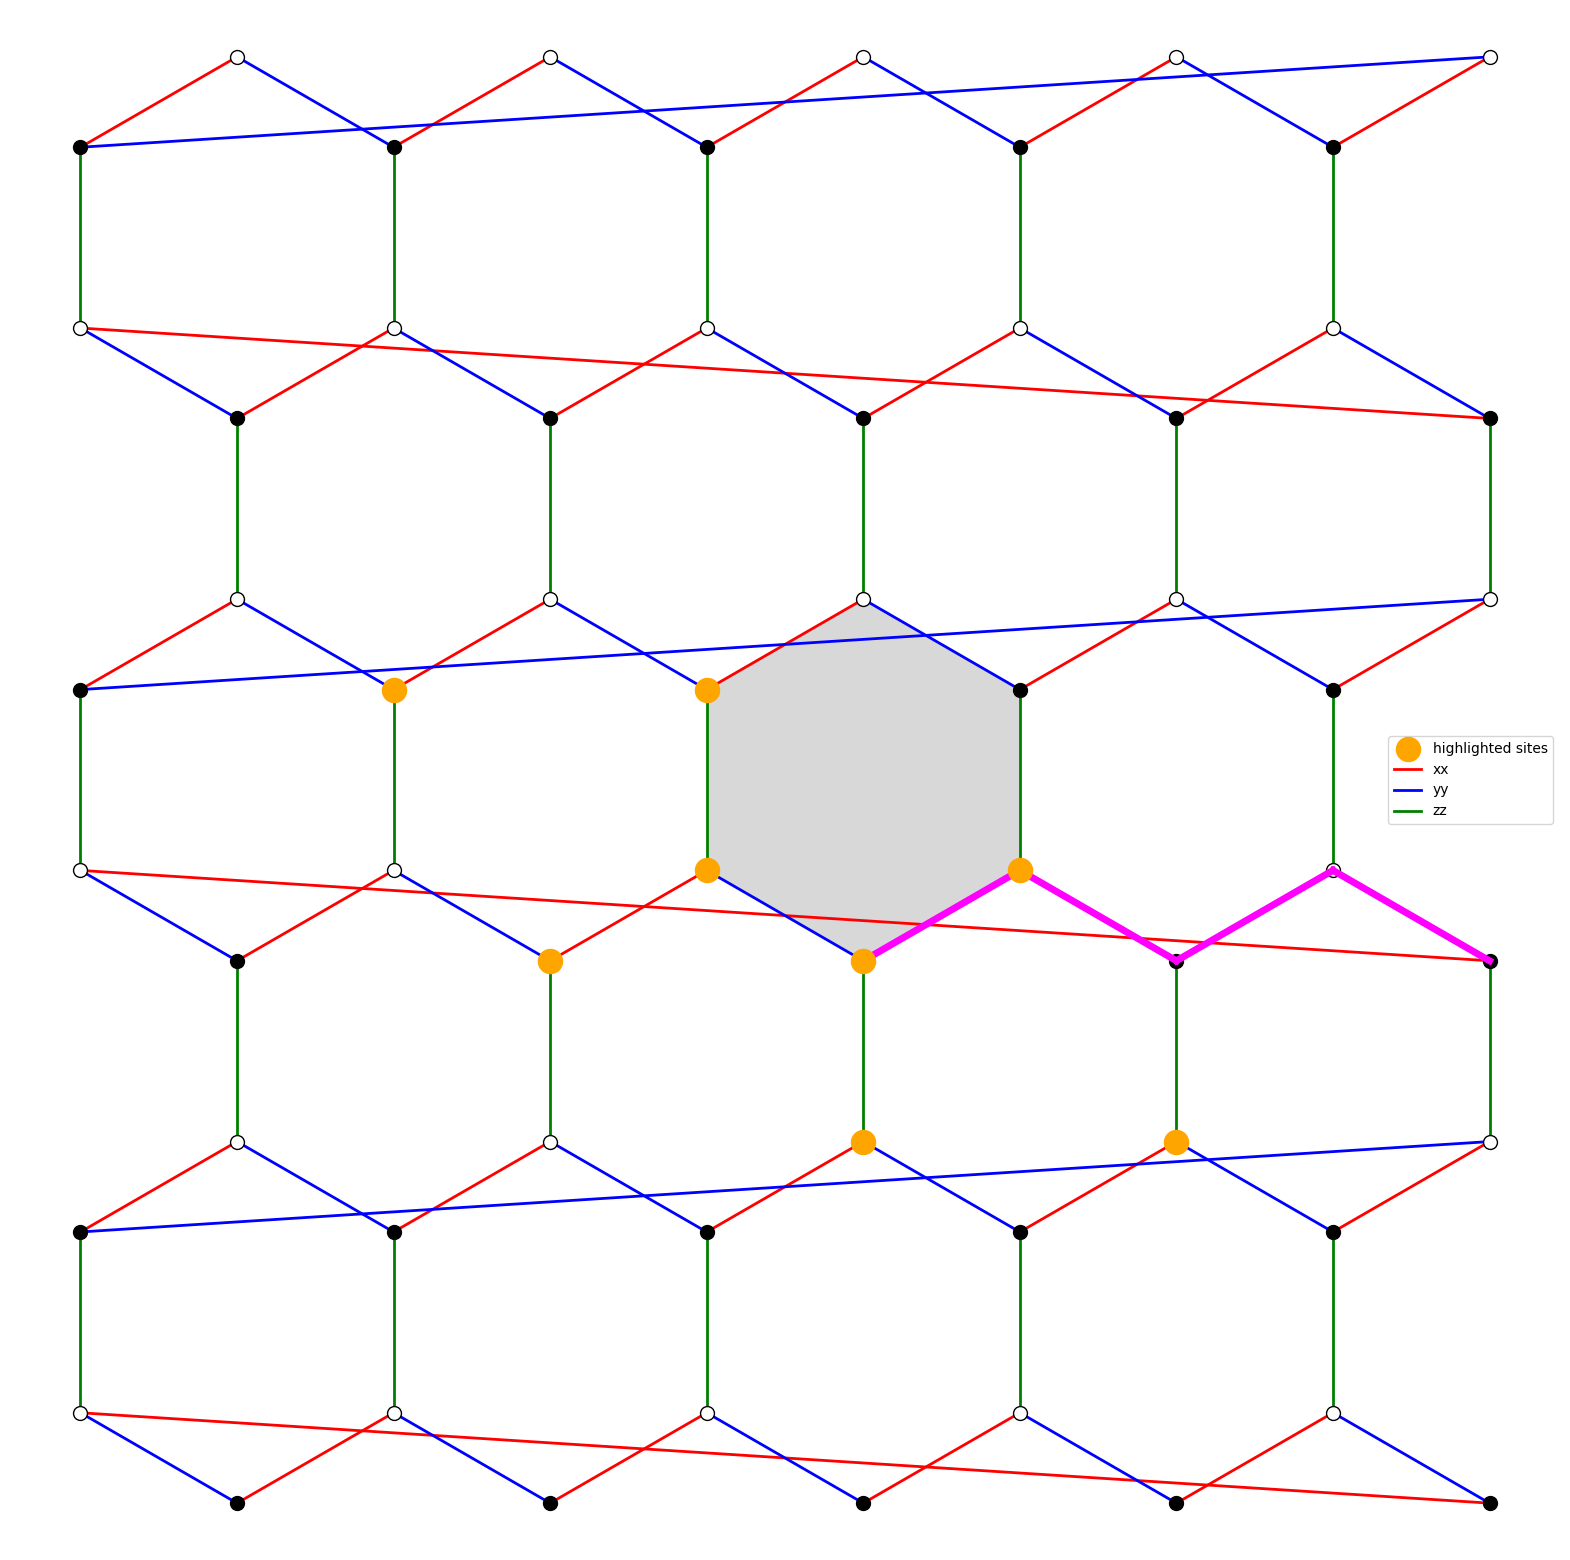

anyon bonds:  ([[np.int64(35), np.int64(36)], [np.int64(36), np.int64(37)], [np.int64(37), np.int64(38)], [np.int64(38), np.int64(39)]], np.int64(5), np.int64(3))


In [9]:
modell = site.SitesPBC(Npx = 5, Npy = 5)
indices = [22,24,33,34,35,36,45,47]
site.plot_honeycomb(modell, plot_anyon_bonds= True, plot_diagonal_bonds = False, sites = indices, plaquette_site = 35)
print("anyon bonds: ", modell.get_anyonbonds())

In [10]:
print(modell.id_to_idxidy(35))
print(modell.idxidy_to_id(5,4))

(5, 3)
45


In [11]:
coords = model.get_coordinates()
print("Coordinates of sites: ", coords)

Coordinates of sites:  [[ 0.         -0.        ]
 [ 0.8660254   0.5       ]
 [ 1.73205081 -0.        ]
 [ 2.59807621  0.5       ]
 [ 3.46410162 -0.        ]
 [ 4.33012702  0.5       ]
 [ 0.         -1.        ]
 [ 0.8660254  -1.5       ]
 [ 1.73205081 -1.        ]
 [ 2.59807621 -1.5       ]
 [ 3.46410162 -1.        ]
 [ 4.33012702 -1.5       ]
 [ 0.         -3.        ]
 [ 0.8660254  -2.5       ]
 [ 1.73205081 -3.        ]
 [ 2.59807621 -2.5       ]
 [ 3.46410162 -3.        ]
 [ 4.33012702 -2.5       ]
 [ 0.         -4.        ]
 [ 0.8660254  -4.5       ]
 [ 1.73205081 -4.        ]
 [ 2.59807621 -4.5       ]
 [ 3.46410162 -4.        ]
 [ 4.33012702 -4.5       ]]


Let us try to do a 3D plot with cyclindric coordinates

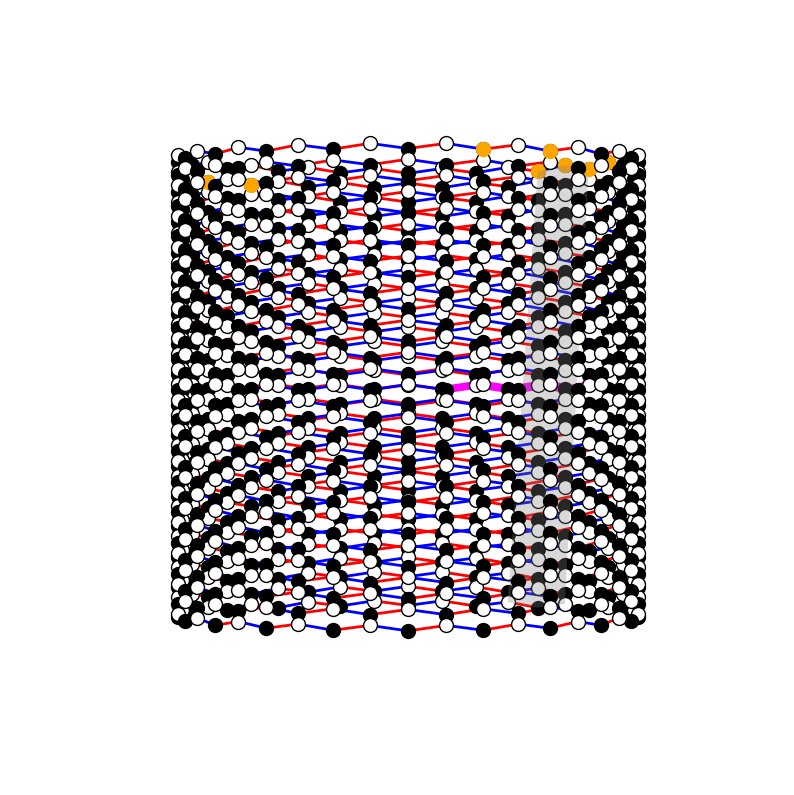

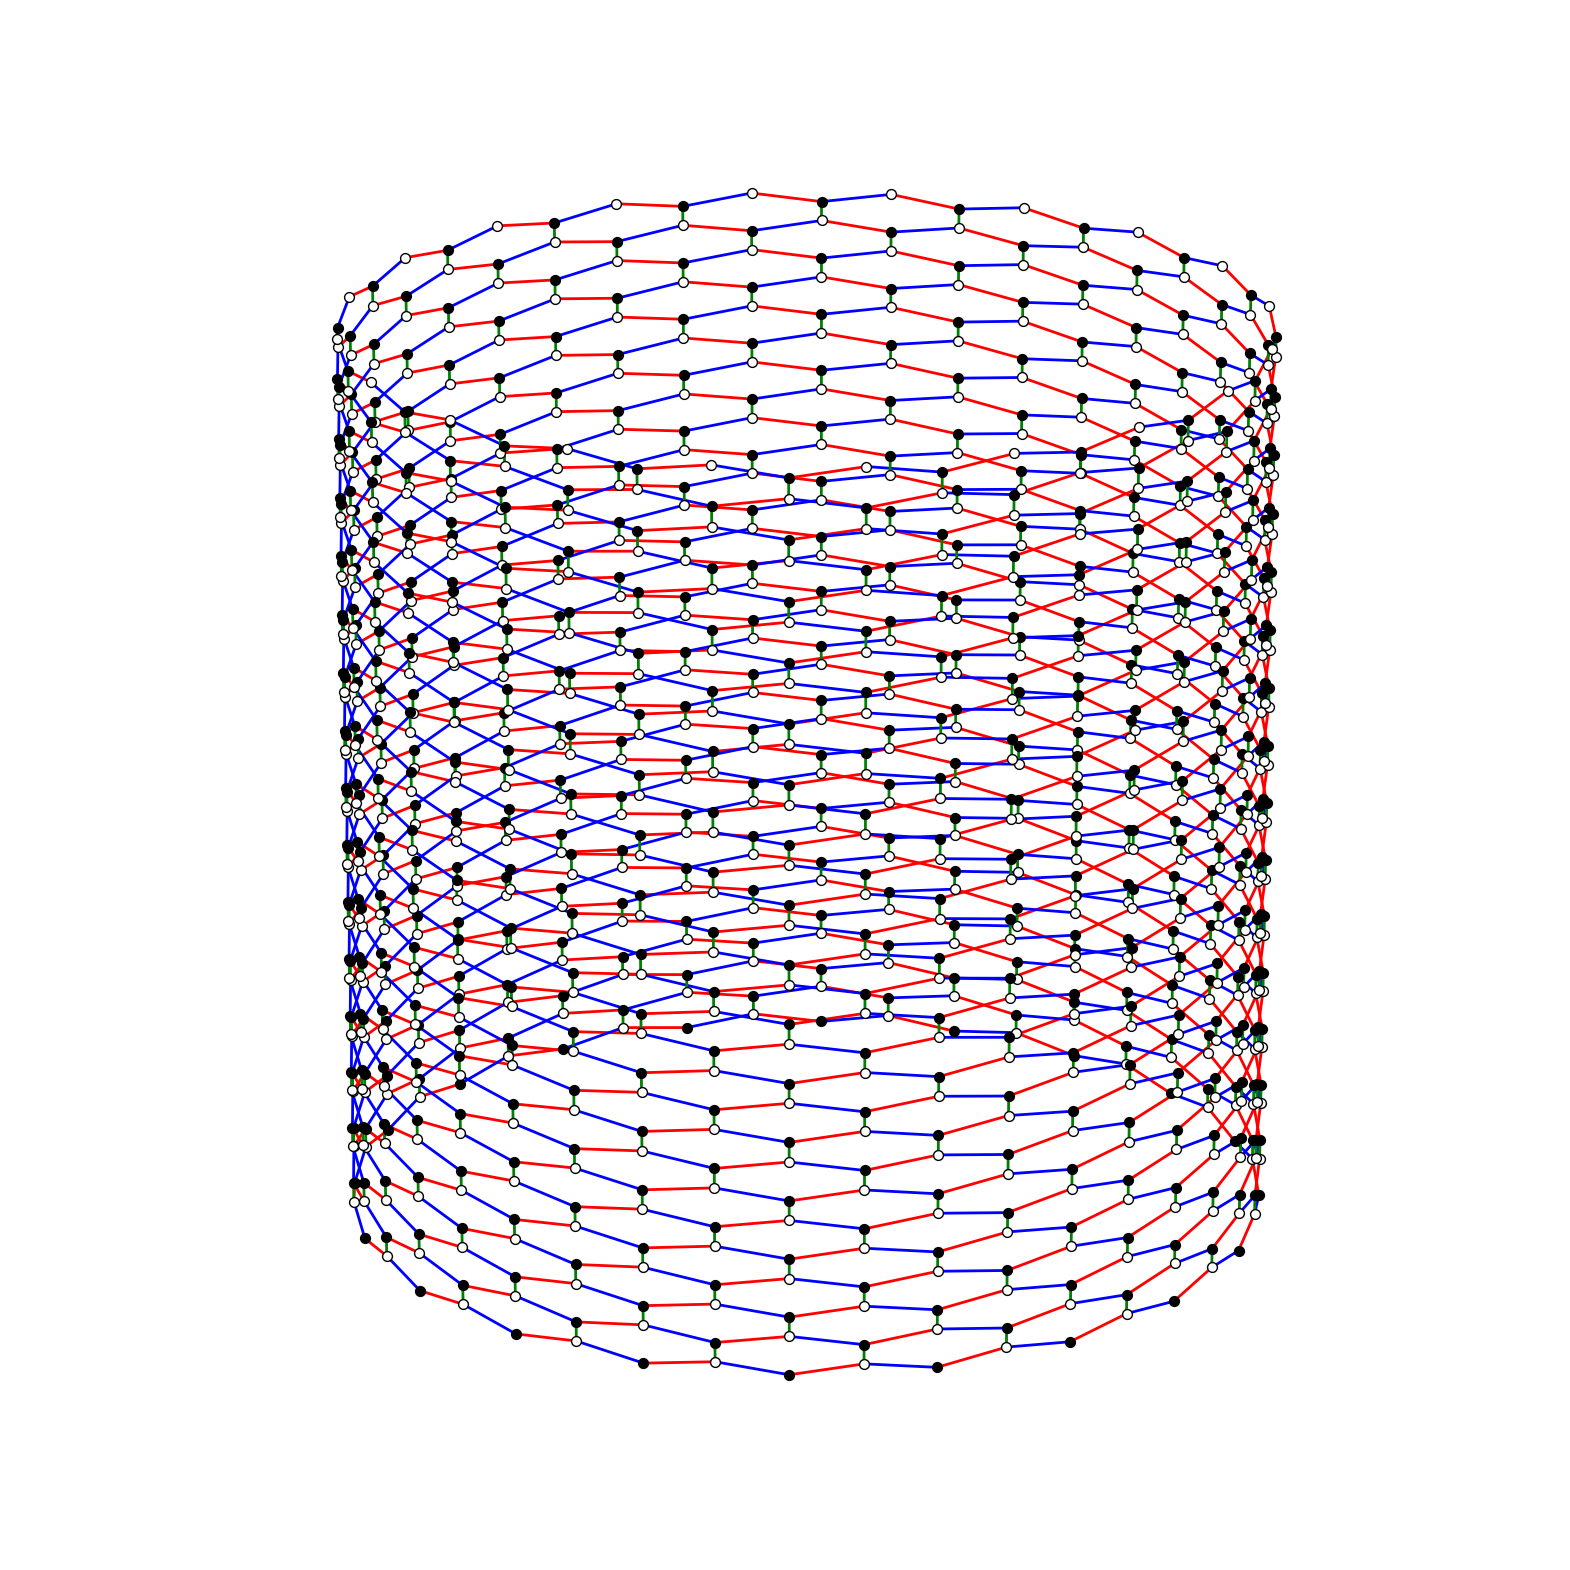

In [12]:
modell = site.SitesPBC(Npx=20, Npy=30)
site.plot_honeycomb_cylinder(modell, make_gif = False, gif_filename = "cylinderr.gif", plot_anyon_bonds = True, sites = indices, plaquette_site = 35, azim = 180, elev = 0)
site.plot_honeycomb_cylinder(modell, make_gif = False, gif_filename = "cylinderr.gif", plot_anyon_bonds = False, fig_size = (20,30), dotsize = 50)

### Fermionic representation of many wonderful things

In [13]:
import free_fermion_representation as f
importlib.reload(f)
import pandas as pd

In [14]:
model = site.SitesPBC(Npx=20, Npy=20)
fgs = f.FermionicGaussianRepresentation(model)
print(model.Nsites)

840


In [15]:
h0_x = f.generate_Hamiltonian_Majorana(model, Jxx=1.0, Jyy=0.0, Jzz=0.0)*(1/1j)
h0_y = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=1.0, Jzz=0.0)*(1/1j)
h0_z = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=0.0, Jzz=1.0)*(1/1j)

H0_x = fgs.Hamiltonian_dirac(h0_x)
H0_y = fgs.Hamiltonian_dirac(h0_y)
H0_z = fgs.Hamiltonian_dirac(h0_z)

dfx = pd.DataFrame(H0_x)
dfy = pd.DataFrame(H0_y)
dfz = pd.DataFrame(H0_z)

print("Hamiltonian H0_x:\n", dfx.round(2))
print("Hamiltonian H0_y:\n", dfy.round(2))
print("Hamiltonian H0_z:\n", dfz.round(2))

Adding xx bonds with Jxx = 1.0
Adding yy bonds with Jyy = 1.0
Adding zz bonds with Jzz = 1.0
Hamiltonian H0_x:
           0         1         2         3         4         5         6    \
0   -1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
1    0.0+0.0j -1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2    0.0+0.0j  0.0+0.0j -1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
3    0.0+0.0j  0.0+0.0j  0.0+0.0j -1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
4    0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j -1.0+0.0j  0.0+0.0j  0.0+0.0j   
..        ...       ...       ...       ...       ...       ...       ...   
835  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
836  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
837  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
838  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
839  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.

In [16]:
he_x = f.generate_Hamiltonian_Majorana(model, Jxx=1.0, Jyy=0.0, Jzz=0.0, type='Anyon')*(1/1j)
he_y = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=1.0, Jzz=0.0, type='Anyon')*(1/1j)
he_z = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=0.0, Jzz=1.0, type='Anyon')*(1/1j)

He_x = fgs.Hamiltonian_dirac(he_x)
He_y = fgs.Hamiltonian_dirac(he_y)
He_z = fgs.Hamiltonian_dirac(he_z)

# dfex = pd.DataFrame(He_x)
# dfey = pd.DataFrame(He_y)
# dfez = pd.DataFrame(He_z)

# print("Hamiltonian He_x:\n", dfex.round(2))
# print("Hamiltonian He_y:\n", dfey.round(2))
# print("Hamiltonian He_z:\n", dfez.round(2))

Adding xx bonds with Jxx = 1.0
type = Anyon!
Adding yy bonds with Jyy = 1.0
type = Anyon!
Adding zz bonds with Jzz = 1.0
type = Anyon!


In [17]:
#check if elements He[20,21] He[21,22] He[22,23] and transpose are with of opposite sign
#with respect to H0
for i in [20,21,22]:
    print(i)
    print(h0_x[i,i+1], he_x[i,i+1])
    print(h0_x[i+1,i], he_x[i+1,i])
    print()
    print(h0_y[i,i+1], he_y[i,i+1])
    print(h0_y[i+1,i], he_y[i+1,i])
    print()
    print(h0_z[i,i+1], he_z[i,i+1])
    print(h0_z[i+1,i], he_z[i+1,i])
    print()

#WORKS

20
(0.5+0j) (0.5+0j)
(-0.5-0j) (-0.5-0j)

0j 0j
0j 0j

0j 0j
0j 0j

21
0j 0j
0j 0j

(-0.5-0j) (-0.5-0j)
(0.5+0j) (0.5+0j)

0j 0j
0j 0j

22
(0.5+0j) (0.5+0j)
(-0.5-0j) (-0.5-0j)

0j 0j
0j 0j

0j 0j
0j 0j



# Topological Order Parameter

Create the loop around central plaquette

In [29]:
indices = [22,24,33,34,35,36,45,47]
# loop = [1 if i in indices else 0 for i in range(model.Nsites)]
loop = np.zeros(model.Nsites)
loop[indices] = 1  # sets all specified indices to 1

print(loop)

print(fgs.expectation_val_Majorana_string(loop))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Now we time evolve the covariance matrix and then measure the loop again!

## Majorana notation
R = e^4h

In [30]:
from scipy.linalg import expm

In [31]:
T = 0.9
t = T*np.pi/4.
Rex = expm(he_x*t*4)
Rey = expm(he_y*t*4)
Rez = expm(he_z*t*4)
fgs.update_cov_matrix(Rex)
fgs.update_cov_matrix(Rey)
fgs.update_cov_matrix(Rez)

print(fgs.expectation_val_Majorana_string(loop))

(0.0004668618611955498-0j)


In [32]:
R0x = expm(h0_x*t*4)
R0y = expm(h0_y*t*4)
R0z = expm(h0_z*t*4)
fgs.update_cov_matrix(R0x)
fgs.update_cov_matrix(R0y)
fgs.update_cov_matrix(R0z)

print(fgs.expectation_val_Majorana_string(loop))


(9.941921013852757e-07-0j)


## Dirac notation
(wrong for now)

In [33]:
# t = np.pi/12
# fgs.update_corr_matrix(He_x,t)
# fgs.update_corr_matrix(He_y,t)
# fgs.update_corr_matrix(He_z,t)

# fgs.Cov = fgs.corr_to_cov()

# print(fgs.expectation_val_Majorana_string(loop))


We define R = R0z R0y R=x as the operator to diagonalize to find the quasi energies of the floquet operator $U = e^{- i \hat{H} t}$

In [34]:
R = R0z @ R0y @ R0x 

Now we proceed with doing the fourier transform of R, thus block diagonalizing R such that each block has eigenvalues indexed by a specific k momentum!

In [35]:
S = model.reordering_operator()
print(S.shape)
print(np.linalg.norm(S @ S.T - np.eye(S.shape[0])))
FT, ks = model.FTOperator()

(840, 840)
0.0


In [36]:
# block-diagonalize
Rk = FT.T.conj() @ R @ FT

len_block = 2*model.Nyrows

print(len_block)

# diagonalize blocks
eps = []
for i in range(model.Npx):
    e = np.linalg.eigvals(Rk[len_block*i:len_block*i+len_block, len_block*i:len_block*i+len_block])
    eps.append(e)
eps = np.real_if_close(1j * np.log(eps))

42


Text(0.5, 1.0, 'Quasi-energy dispersion relation, JT = 0.9')

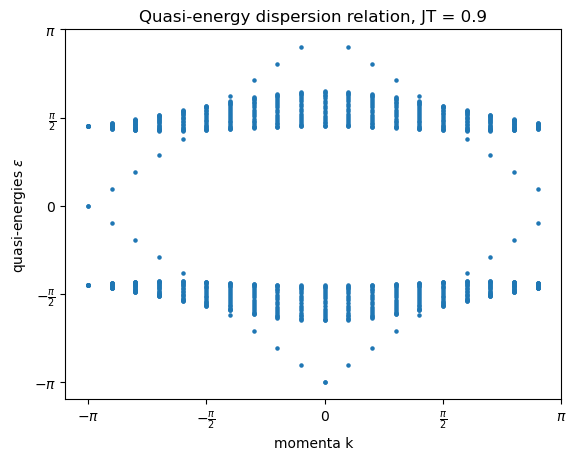

In [37]:
plt.scatter(np.stack([ks]*len_block, axis=-1).reshape(-1), np.reshape(eps, -1), s=5.)
plt.xlabel('momenta k')
plt.ylabel(r'quasi-energies $\epsilon$')
plt.xticks(ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
                  labels=[r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.yticks(ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
                  labels=[r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.title(f'Quasi-energy dispersion relation, JT = {T}' )

In [27]:
# eigvals, eigvecs = np.linalg.eig(R)
# print(eigvals)